In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
today_str = '052123'

In [13]:
model_types = ['rf', 'xgb', 'nn']
res_dfs = {}
for model_type in model_types:
    res_dfs[model_type] = pd.read_csv(f'../results/res_{model_type}_{today_str}.csv')
    res_dfs[model_type]['model'] = model_type
    res_dfs[model_type].drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
res_dfs['rf'].head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
0,vegf,OS,clin,0.579641,0.955003,0.9397616171346849-0.9702434105174015,0.973500,0.9616907935783756-0.9853085063472744,rf
1,reg,PFS,comb,0.738828,0.989011,0.9656997764443996-1.0123222015775786,0.994294,0.9774518455256307-1.0111364892165495,rf
2,reg,PFS,mut,0.723993,1.000000,1.0-1.0,1.000000,1.0-1.0,rf
3,reg,PFS,cna,0.724908,1.000000,1.0-1.0,1.000000,1.0-1.0,rf
4,reg,PFS,clin,0.727106,1.000000,1.0-1.0,1.000000,0.9999999966679989-1.0000000033320007,rf


In [15]:
res_comb = pd.concat(res_dfs.values())
res_comb.head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
0,vegf,OS,clin,0.579641,0.955003,0.9397616171346849-0.9702434105174015,0.973500,0.9616907935783756-0.9853085063472744,rf
1,reg,PFS,comb,0.738828,0.989011,0.9656997764443996-1.0123222015775786,0.994294,0.9774518455256307-1.0111364892165495,rf
2,reg,PFS,mut,0.723993,1.000000,1.0-1.0,1.000000,1.0-1.0,rf
3,reg,PFS,cna,0.724908,1.000000,1.0-1.0,1.000000,1.0-1.0,rf
4,reg,PFS,clin,0.727106,1.000000,1.0-1.0,1.000000,0.9999999966679989-1.0000000033320007,rf


In [16]:
res_comb.sort_values(by='test_auroc_mean', ascending=False, inplace=True)
res_comb.head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
16,reg,OS,clin,0.687270,1.0,1.0-1.0,1.0,1.0-1.0,rf
2,reg,PFS,mut,0.723993,1.0,1.0-1.0,1.0,1.0-1.0,rf
3,reg,PFS,cna,0.724908,1.0,1.0-1.0,1.0,1.0-1.0,rf
4,reg,PFS,clin,0.727106,1.0,1.0-1.0,1.0,0.9999999966679989-1.0000000033320007,rf
8,reg,OS,comb,0.685619,1.0,1.0-1.0,1.0,0.9999999967482999-1.0000000032516998,rf


In [17]:
res_comb.sort_values(by='val_auroc', ascending=False, inplace=True)
res_comb.head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
3,reg,OS,comb,0.833425,0.800000,0.7127128439056031-0.887287156094397,0.922542,0.8642082581651476-0.9808750887854596,nn
0,reg,OS,mut,0.816623,0.250000,0.1555088817476932-0.3444911182523068,0.754505,0.6605887750362044-0.8484220339609457,nn
5,reg,PFS,cna,0.811111,0.556818,0.4428533455481898-0.670783018088174,0.768048,0.6712166956215206-0.8648795610629714,xgb
9,reg,PFS,comb,0.805556,0.607955,0.4959522390601298-0.719956851848961,0.616691,0.5051509361912031-0.7282313677793358,xgb
2,reg,OS,cna,0.765825,0.411111,0.3037401995958233-0.5184820226263989,0.743911,0.6486646200216261-0.8391565302763043,nn


In [18]:
res_comb.groupby(['drug', 'outcome', 'data_type']).head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
3,reg,OS,comb,0.833425,0.800000,0.7127128439056031-0.887287156094397,0.922542,0.8642082581651476-0.9808750887854596,nn
0,reg,OS,mut,0.816623,0.250000,0.1555088817476932-0.3444911182523068,0.754505,0.6605887750362044-0.8484220339609457,nn
5,reg,PFS,cna,0.811111,0.556818,0.4428533455481898-0.670783018088174,0.768048,0.6712166956215206-0.8648795610629714,xgb
9,reg,PFS,comb,0.805556,0.607955,0.4959522390601298-0.719956851848961,0.616691,0.5051509361912031-0.7282313677793358,xgb
2,reg,OS,cna,0.765825,0.411111,0.3037401995958233-0.5184820226263989,0.743911,0.6486646200216261-0.8391565302763043,nn
...,...,...,...,...,...,...,...,...,...
6,egfr,OS,mut,0.520007,0.857265,0.8157510447301184-0.8987788697997963,0.913267,0.8798662696745146-0.9466685070195339,rf
18,vegf,PFS,clin,0.519615,0.838339,0.8107455018572561-0.8659319873202328,0.736119,0.7030842941015593-0.7691533590444083,rf
9,egfr,OS,clin,0.518986,0.783810,0.7349561712215523-0.8326628763974954,0.888781,0.8514686340115102-0.9260941018369574,rf
21,vegf,PFS,cna,0.518204,0.838765,0.8112008160664479-0.8663285511180918,0.811276,0.7819475260539157-0.8406042717438764,rf


In [19]:
drugs = ['reg', 'vegf', 'egfr']
outcomes = ['PFS', 'OS']
res_drug_out = {}
for drug in drugs:
    for outcome in outcomes:
        res_drug_out[str(drug) + '_' + str(outcome)] = res_comb[(res_comb['drug'] == drug) & (res_comb['outcome'] == outcome)]


In [20]:
res_drug_out['reg_PFS'].head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
5,reg,PFS,cna,0.811111,0.556818,0.4428533455481898-0.670783018088174,0.768048,0.6712166956215206-0.8648795610629714,xgb
9,reg,PFS,comb,0.805556,0.607955,0.4959522390601298-0.719956851848961,0.616691,0.5051509361912031-0.7282313677793358,xgb
1,reg,PFS,comb,0.738828,0.989011,0.9656997764443996-1.0123222015775786,0.994294,0.9774518455256307-1.0111364892165495,rf
6,reg,PFS,mut,0.736111,0.375000,0.2639345854201702-0.4860654145798298,0.571382,0.4578489425522568-0.6849147265272018,xgb
4,reg,PFS,clin,0.727106,1.000000,1.0-1.0,1.000000,0.9999999966679989-1.0000000033320007,rf


In [21]:
res_comb.head()

,drug,outcome,data_type,val_auroc,test_auroc_mean,test_auroc_ci,test_auprc_mean,test_auprc_ci,model
3,reg,OS,comb,0.833425,0.800000,0.7127128439056031-0.887287156094397,0.922542,0.8642082581651476-0.9808750887854596,nn
0,reg,OS,mut,0.816623,0.250000,0.1555088817476932-0.3444911182523068,0.754505,0.6605887750362044-0.8484220339609457,nn
5,reg,PFS,cna,0.811111,0.556818,0.4428533455481898-0.670783018088174,0.768048,0.6712166956215206-0.8648795610629714,xgb
9,reg,PFS,comb,0.805556,0.607955,0.4959522390601298-0.719956851848961,0.616691,0.5051509361912031-0.7282313677793358,xgb
2,reg,OS,cna,0.765825,0.411111,0.3037401995958233-0.5184820226263989,0.743911,0.6486646200216261-0.8391565302763043,nn


1.0
0.8550000000000001
0.95
0.775


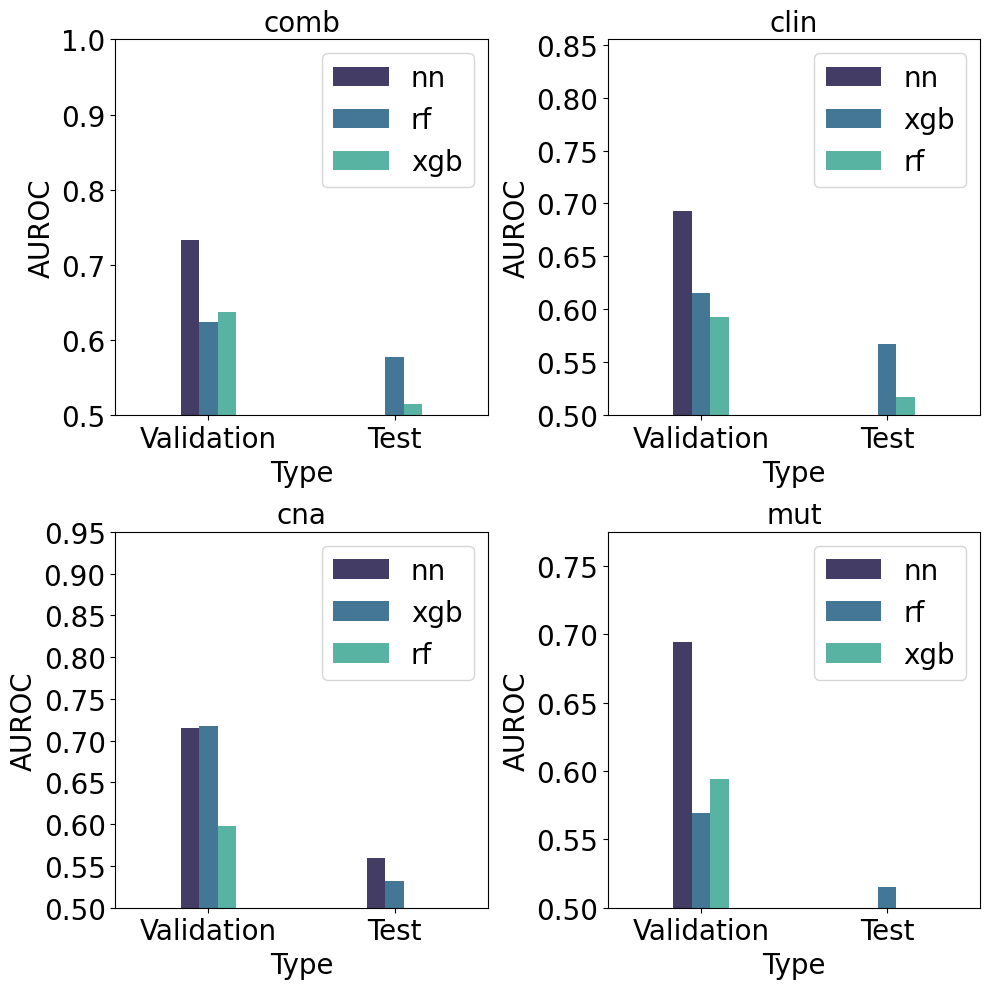

In [42]:

#plot the 4 data types in a 2x2 grid

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, data_type in enumerate(['comb', 'clin', 'cna', 'mut']):
    res_data = res_comb[res_comb['data_type'] == data_type]
    res_data = res_data[['model', 'val_auroc', 'test_auroc_mean']]
    ymax = max(res_data['val_auroc'].max(), res_data['test_auroc_mean'].max())
    res_data.columns = ['Model', 'Validation', 'Test']
    res_data = res_data.melt(id_vars='Model', var_name='Type', value_name='AUROC')
    #make the size of the bars narrower
    ax = ax.flatten()
    sns.barplot(x='Type', y='AUROC', hue='Model', data=res_data, errorbar=None, ax=ax[i], palette='mako', width=0.3)
    
    ax[i].set_title(f'{data_type}')
    ax[i].set_ylim(0.5, ymax)
    #make the font bigger
    for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] + ax[i].get_xticklabels() + ax[i].get_yticklabels()):
            item.set_fontsize(20)
    ax[i].legend(fontsize=20)
plt.tight_layout()
plt.show()

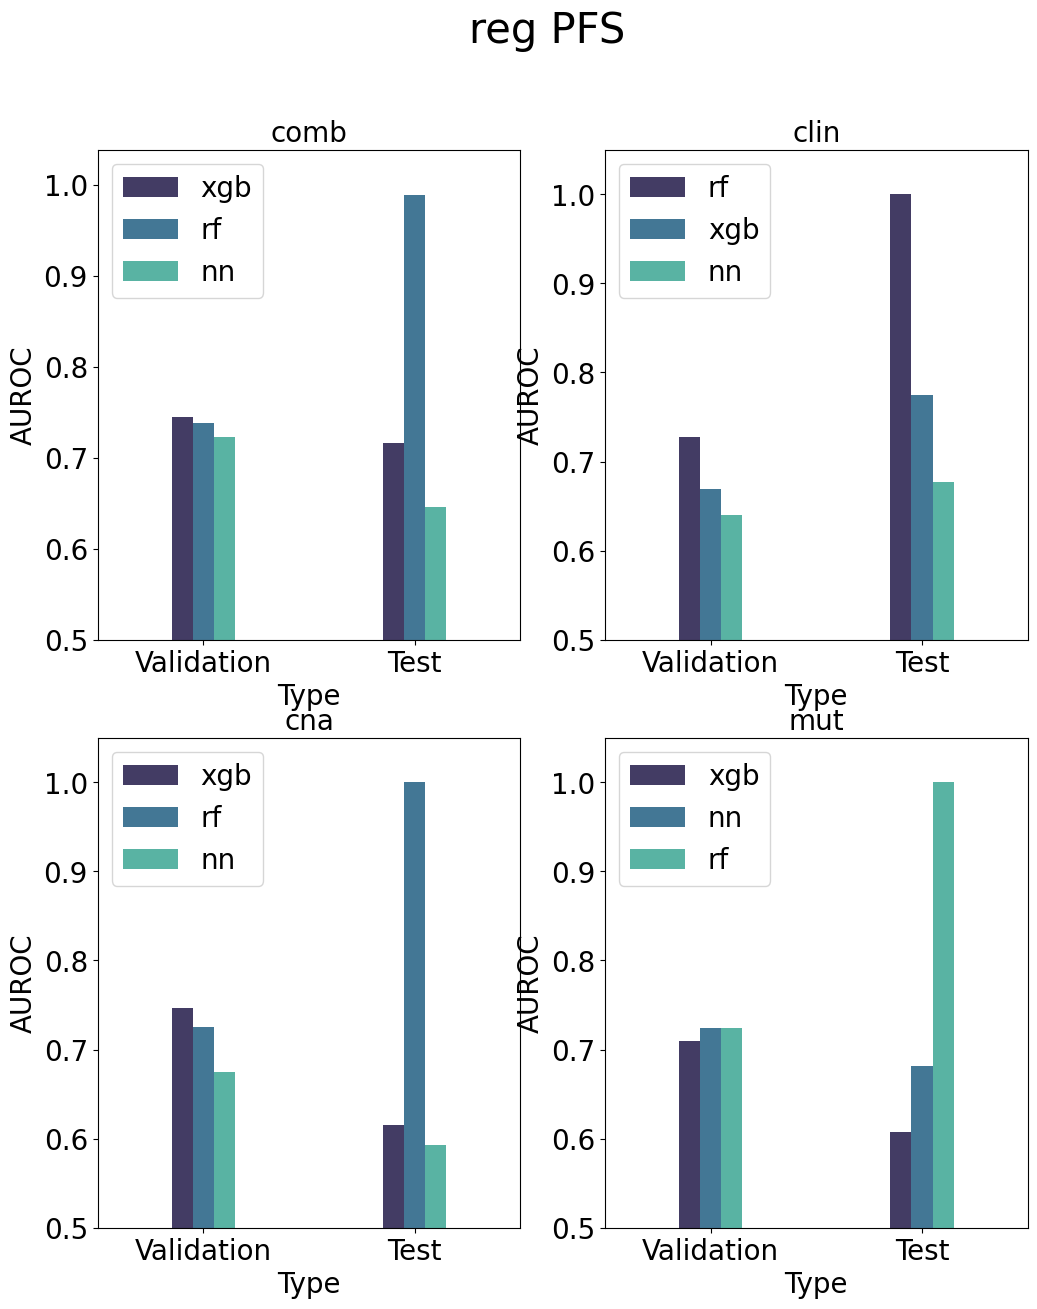

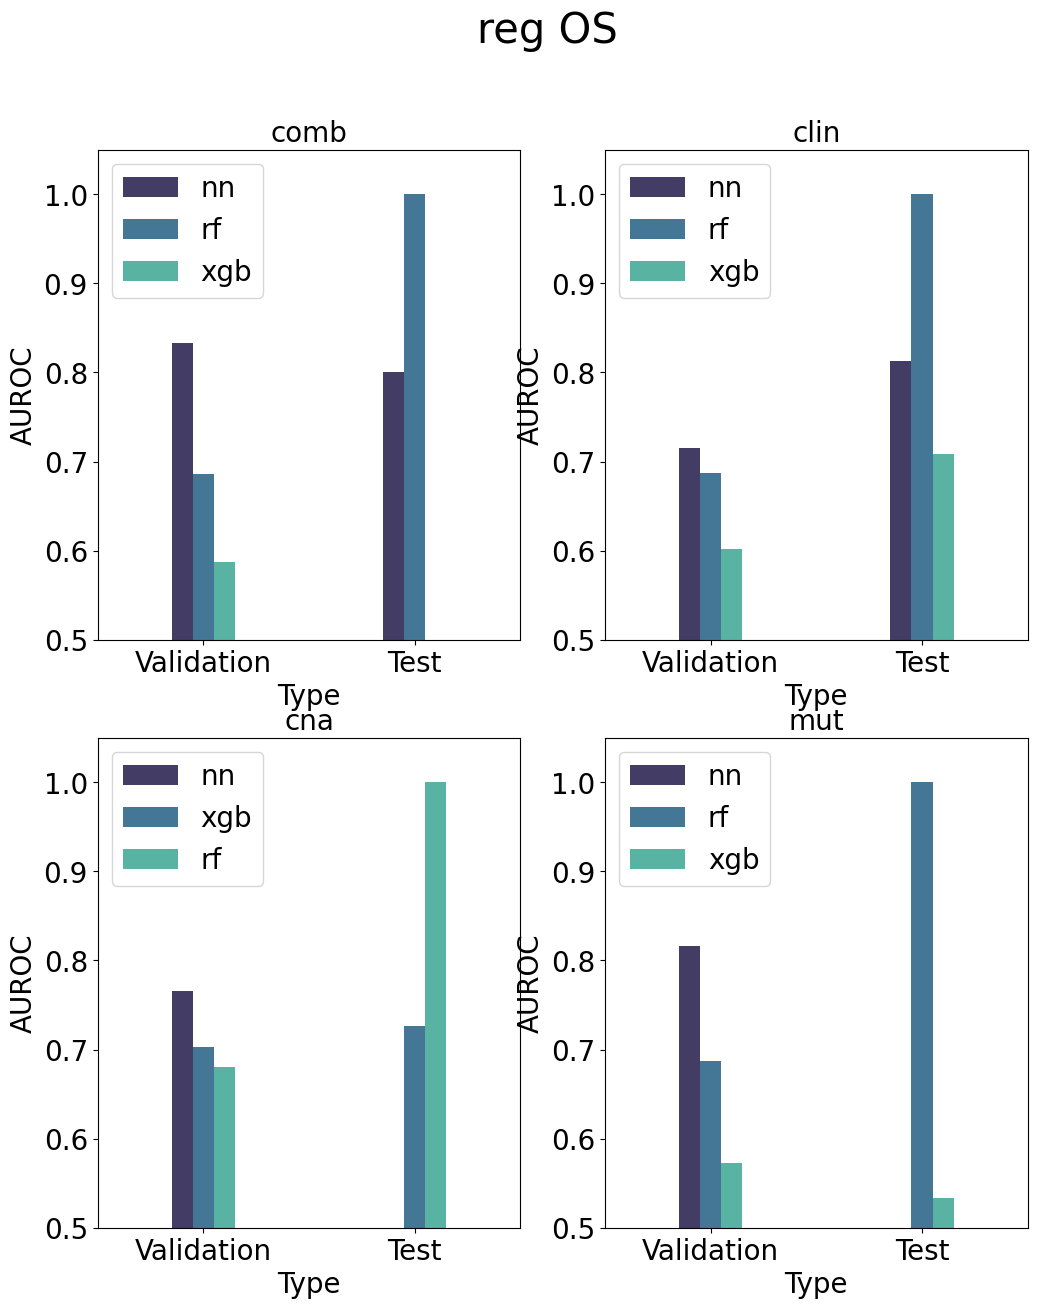

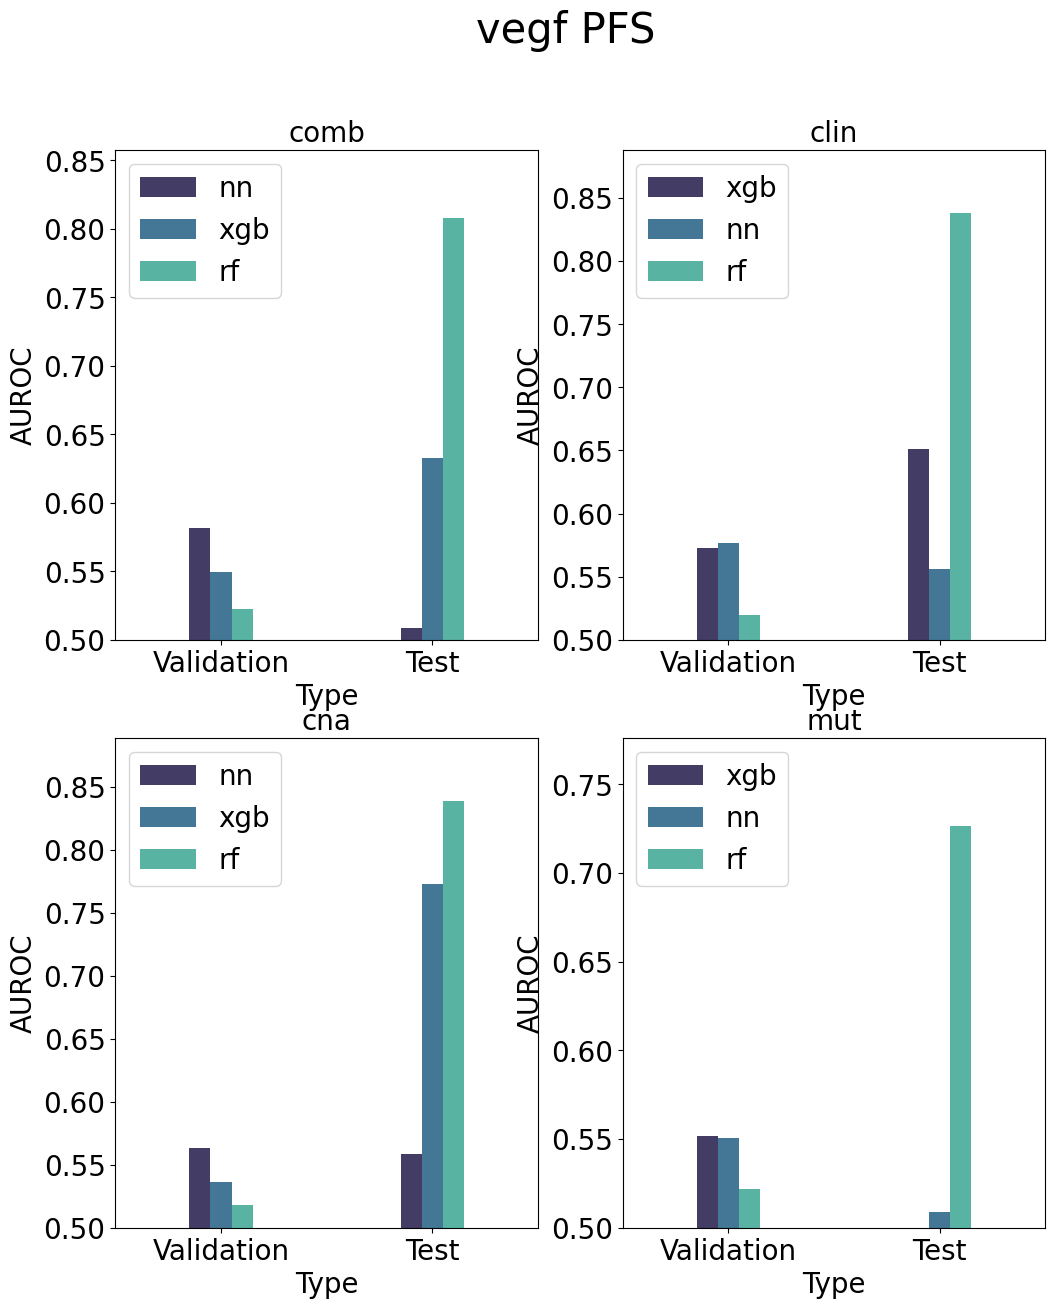

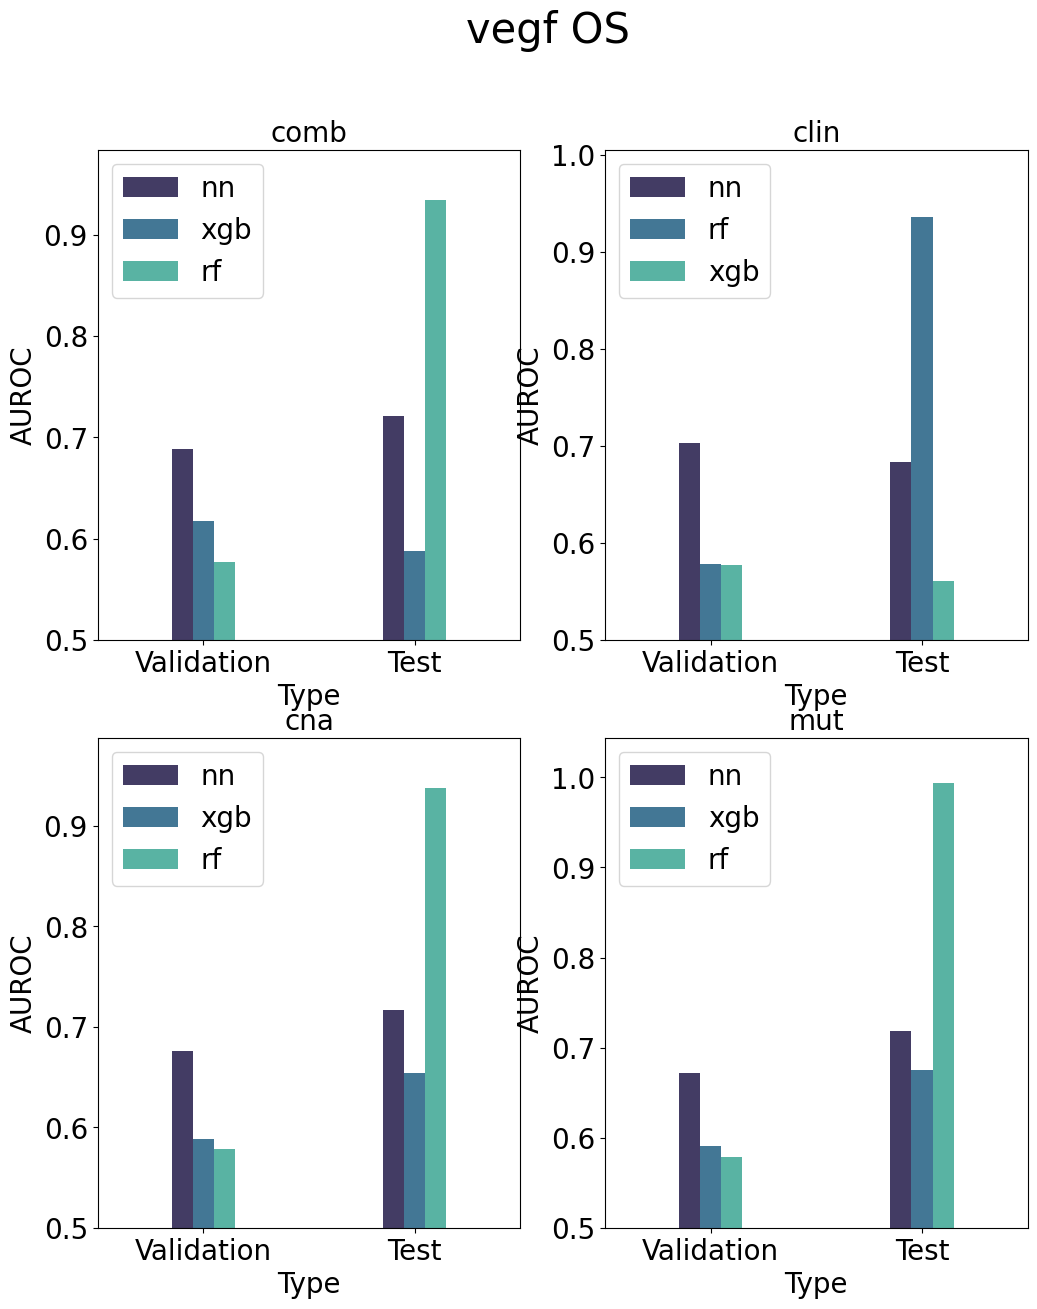

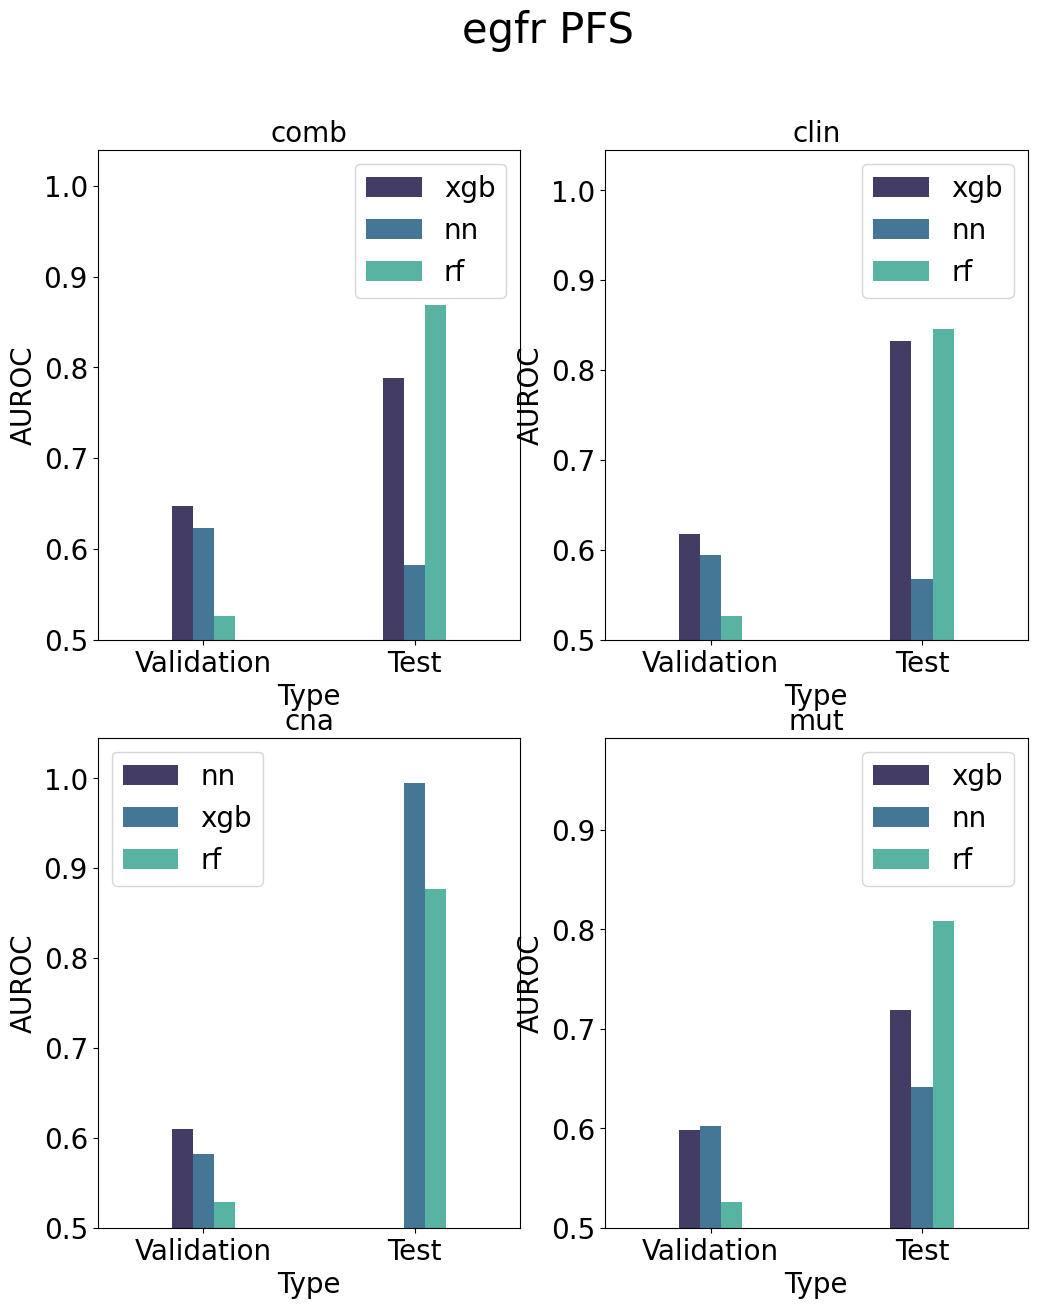

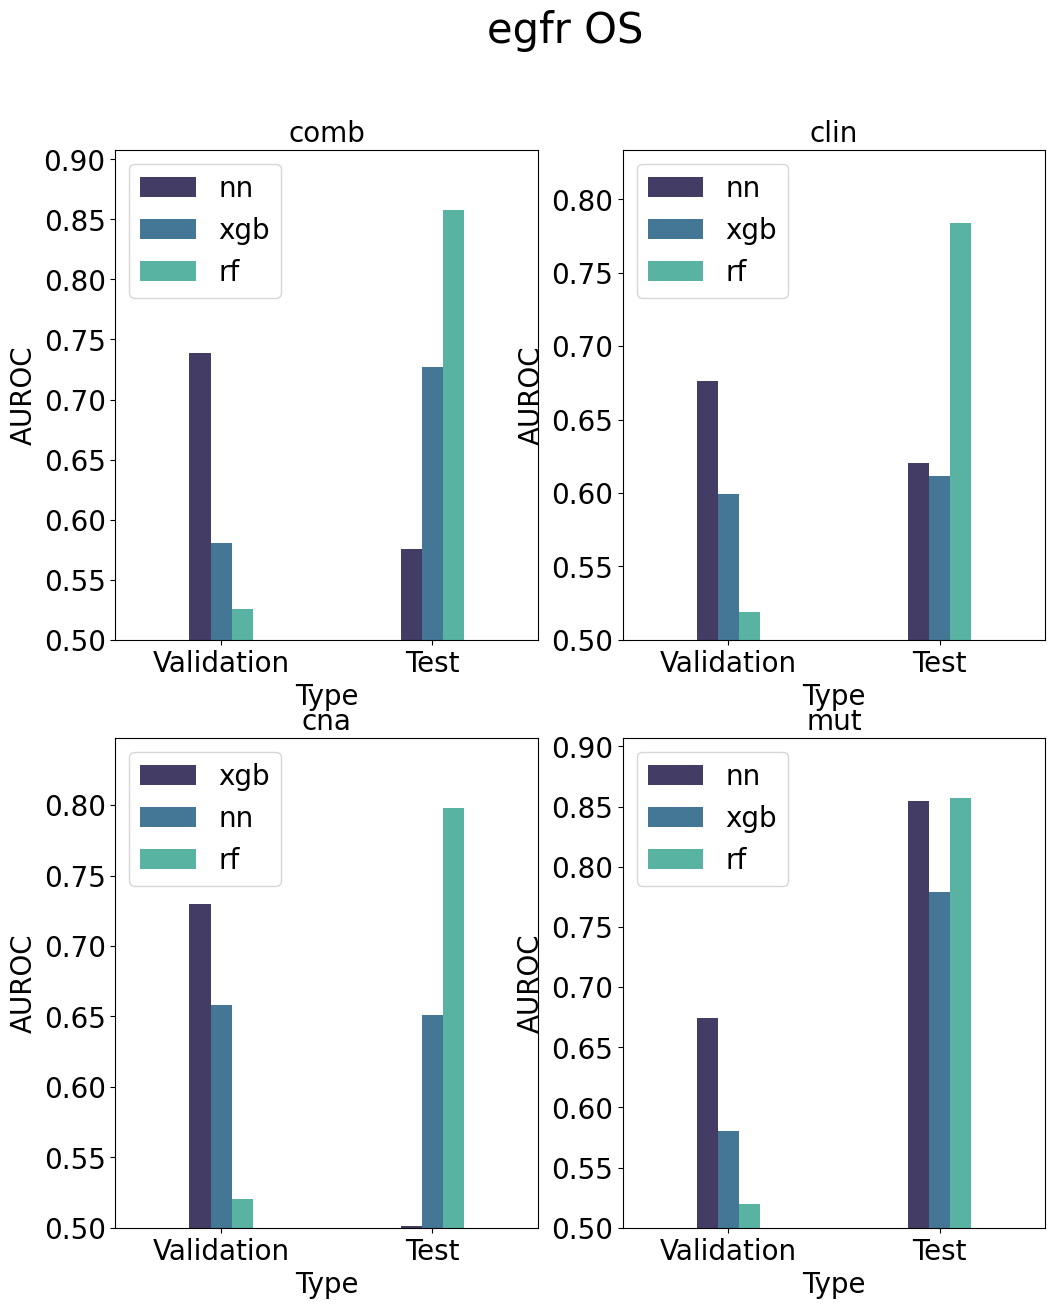

In [22]:
#now do the same thing, except plot them all on the same figure
for drug in drugs:
      for outcome in outcomes:
            plot_df = res_drug_out[str(drug) + '_' + str(outcome)]
            fig, ax = plt.subplots(2, 2, figsize=(12, 14))
            for i, data_type in enumerate(['comb', 'clin', 'cna', 'mut']):
                  res_data = plot_df[plot_df['data_type'] == data_type]
                  res_data = res_data[['model', 'val_auroc', 'test_auroc_mean']]
                  ymax = max(res_data['val_auroc'].max(), res_data['test_auroc_mean'].max())
                  res_data.columns = ['Model', 'Validation', 'Test']
                  res_data = res_data.melt(id_vars='Model', var_name='Type', value_name='AUROC')
                  #make the size of the bars narrower
                  ax = ax.flatten()
                  sns.barplot(x='Type', y='AUROC', hue='Model', data=res_data, errorbar=None, ax=ax[i], palette='mako', width=0.3)
                  ax[i].set_title(f'{data_type}')
                  ax[i].set_ylim(0.5, ymax + 0.05)
                  #make the font bigger
                  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] + ax[i].get_xticklabels() + ax[i].get_yticklabels()):
                        item.set_fontsize(20)
                  ax[i].legend(fontsize=20)
                  #set the title to be the drug and outcome
                  fig.suptitle(f'{drug} {outcome}', fontsize=30)
            plt.savefig(f'../results/figures/{drug}_{outcome}_{today_str}.png', dpi=300)